In [7]:
#
# Alexey Abramov <alexey.abramov.salzi <at> gmail.com>
#
# The current code contains implementation of Andrew's monotone chain 2D convex hull algorithm.
# Asymptotic complexity: O(n log n).
# Practical performance: 0.5-1.0 seconds for n=1000000 on a 1GHz machine.
#

import random
import matplotlib.pyplot as plt
%matplotlib inline

grid_dimension_x = 10   # X grid dimension
grid_dimension_y = 10   # Y grid dimension


def get_coordinates(points_list):
    """ Extract x and y point coordinates from a list of tuples.
    :param points_list: points as a list of tuples
    :return x and y point coordinates as separate lists
    """

    x = []
    y = []

    for ind in range(len(points_list)):
        x.append(points_list[ind][0])
        y.append(points_list[ind][1])

    return x, y


def cross(o, a, b):
    """ 2D cross product of OA and OB vectors, i.e. z-component of their 3D cross product.
    :param o: point O
    :param a: point A
    :param b: point B
    :return cross product of vectors OA and OB (OA x OB), positive if OAB makes a counter-clockwise turn, negative for clockwise turn, and zero if the points are collinear.
    """

    return (a[0] - o[0]) * (b[1] - o[1]) -\
           (a[1] - o[1]) * (b[0] - o[0])


nmb = 15   # number of points

# generate points
nx = [random.randint(0, grid_dimension_x) for i in range(nmb)]
ny = [random.randint(0, grid_dimension_y) for i in range(nmb)]

# store points as a list of tuples for convex hull computation
points_input = []

for ind in range(nmb):
    points_input.append( (nx[ind], ny[ind]) )

In [8]:
# find the convex hull
    
# Sort the points lexicographically (tuples are compared lexicographically).
# Remove duplicates to detect the case we have just one unique point.
points = sorted(set(points_input))

# Boring case: no points or a single point, possibly repeated multiple times.
if len(points) > 1:

    # Build lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    # Build upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    # Concatenation of the lower and upper hulls gives the convex hull
    # The first point occurs in the list twice, since it's at the same time the last point
    convex_hull_vertices = lower[:] + upper[:]

    print 'convex_hull_vertices = ', convex_hull_vertices

convex_hull_vertices =  [(1, 3), (6, 0), (8, 2), (10, 6), (10, 10), (10, 10), (6, 10), (1, 7), (1, 3)]


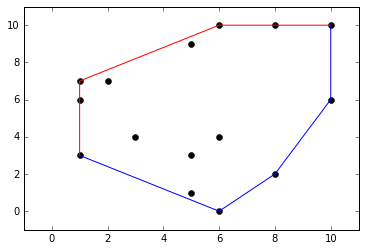

In [9]:
# plot data
plt.figure("Convex hull computation")

# grid
plt.axis( [-1, grid_dimension_x + 1, -1, grid_dimension_y + 1] )

# plot input points
points_x, points_y = get_coordinates(points)
plt.plot(points_x, points_y, 'ko')

# draw lower convex hull
lower_x, lower_y = get_coordinates(lower)
plt.plot(lower_x, lower_y, linestyle='-', color='blue')

# draw upper convex hull
upper_x, upper_y = get_coordinates(upper)
plt.plot(upper_x, upper_y, linestyle='-', color='red')

In [21]:
# pick a point to be checked
x = random.randint(0, grid_dimension_x)
y = random.randint(0, grid_dimension_y)

inside = True

for ind in range(1, len(convex_hull_vertices)):
    res = cross(convex_hull_vertices[ind-1], convex_hull_vertices[ind], (x,y))
    print 'cross res = ', res

    if res < 0:
        inside = False

if inside:
    str_output = 'inside'
else:
    str_output = 'outside'

print 'The picked point is', str_output

cross res =  44
cross res =  24
cross res =  32
cross res =  24
cross res =  0
cross res =  0
cross res =  -6
cross res =  12
The picked point is outside


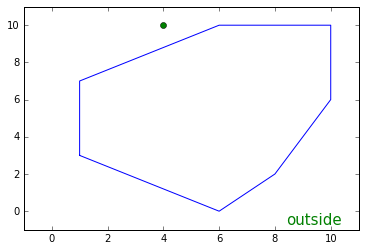

In [22]:
# plot data
fig = plt.figure("Checking a point")
plt.axis( [-1, grid_dimension_x + 1, -1, grid_dimension_y + 1] )

# label with the check result
ax = fig.add_subplot(111)
ax.text(0.95, 0.01, str_output, verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, color='green', fontsize=15)

# obtained convex hull
hull_x, hull_y = get_coordinates(convex_hull_vertices)
plt.plot(hull_x, hull_y, linestyle='-', color='blue')

# point to be checked
plt.plot(x, y, 'go')